In [1]:
from surprise import KNNWithMeans
##from surprise import BaselineOnly
from surprise import SVD
from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import Reader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("ratings_Electronics.csv")

In [3]:
df1.columns=["userid", "productid", "ratings", "timestamp"]
df1.head()

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
df1.shape

(7824481, 4)

In [5]:
print("# Unique users ", df1["userid"].nunique())
print("# Unique products ", df1["productid"].nunique())

# Unique users  4201696
# Unique products  476001


In [6]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


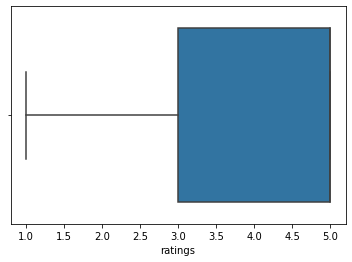

In [7]:
sns.boxplot(df1.ratings)

(array([ 901765.,       0.,  456322.,       0.,       0.,  633073.,
              0., 1485781.,       0., 4347540.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

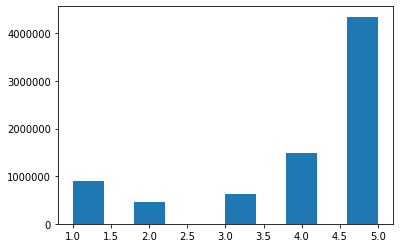

In [8]:
plt.hist(df1.ratings)

# =========================== #

# Create DF only for top users#
Only users with more than 100 reviews

# =========================== #

In [9]:
topusers = df1.groupby(['userid']).count()
topusers = topusers.sort_values(by=['productid'])
topusers.head()
topusers.shape

(4201696, 3)

In [10]:
topusers = topusers[topusers['productid']>100]
topusers = topusers.drop(['productid','ratings','timestamp'],axis=1)
topusers=topusers.reset_index()
topusers.shape

(280, 1)

In [11]:
rating = df1.loc[df1['userid'].isin(topusers['userid'])]
rating.shape

(43309, 4)

In [12]:
print(rating)

                 userid   productid  ratings   timestamp
117       AT09WGFUM934H  0594481813      3.0  1377907200
177      A17HMM1M7T9PJ1  0970407998      4.0  1281744000
630      A3TAS1AG6FMBQW  0972683275      5.0  1353456000
1776     A18S2VGUH9SCV5  1400501776      4.0  1340755200
2161      A5JLAU2ARJ0BO  1400532655      1.0  1291334400
...                 ...         ...      ...         ...
7824425   A1E1LEVQ9VQNK  B00LGQ6HL8      5.0  1405641600
7824426  A2NYK9KWFMJV4Y  B00LGQ6HL8      5.0  1405209600
7824435  A3AYSYSLHU26U9  B00LI4ZZO8      4.0  1405296000
7824437  A2NYK9KWFMJV4Y  B00LI4ZZO8      5.0  1405209600
7824443  A2BYV7S1QP2YIG  B00LKG1MC8      5.0  1404950400

[43309 rows x 4 columns]


In [13]:
ra =rating.groupby("productid").count()

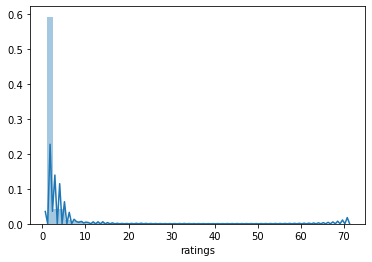

In [14]:
sns.distplot(ra["ratings"],kde=True)

### Observation ###
Some movies have a lot of rating. Popularity based recommendation systems will only recommend the products which have a lot of ratings. 

Wont be useful for products which are introduced new or hasn't gained enough traction.

### ========================================== ###

# Popularity based recommender model #

### ========================================== ###

In [15]:
rat1 = rating.drop(['timestamp','userid'],axis=1)

In [16]:
rat1.head()

,productid,ratings
117,0594481813,3.0
177,0970407998,4.0
630,0972683275,5.0
1776,1400501776,4.0
2161,1400532655,1.0


In [17]:
prod_pop = pd.DataFrame(rat1.groupby('productid').mean())
prod_pop.head()

,ratings
productid,
0594481813,3.0
0970407998,4.0
0972683275,5.0
1400501776,4.0
1400532655,2.0


In [18]:
prod_pop['ratcount'] = pd.DataFrame(rat1.groupby('productid')['ratings'].count())

In [19]:
prod_pop = prod_pop.sort_values(by=['ratcount','ratings'],ascending=False)
prod_pop.head(20)

,ratings,ratcount
productid,,
B0088CJT4U,4.225352,71
B002R5AM7C,4.120690,58
B003ES5ZUU,5.000000,54
B004CLYEDC,4.673469,49
B00829TIEK,4.510204,49
B000N99BBC,4.765957,47
B008DWCRQW,4.088889,45
B00829THK0,4.477273,44
B004CLYEFK,4.720930,43


In [20]:
prod_pop = prod_pop.sort_values(by=['ratings','ratcount'],ascending=False)
prod_pop.head(20)

,ratings,ratcount
productid,,
B003ES5ZUU,5.0,54
B0052SCU8U,5.0,15
B0000BZL1P,5.0,13
B00HZWJGS8,5.0,13
B00CMJZAOI,5.0,12
B00ISFNSBW,5.0,12
B00017LSPI,5.0,11
B0036Q7MV0,5.0,11
B00L3YHF6O,5.0,11


In [21]:
prod_pop['rat_to_count_ratio'] = prod_pop['ratings']/prod_pop['ratcount']

In [22]:
prod_pop = prod_pop.sort_values(by=['rat_to_count_ratio'])
prod_pop.head(20)

,ratings,ratcount,rat_to_count_ratio
productid,,,
B0088CJT4U,4.225352,71,0.059512
B002R5AM7C,4.120690,58,0.071046
B002SQK2F2,3.000000,39,0.076923
B008DWCRQW,4.088889,45,0.090864
B00829TIEK,4.510204,49,0.092045
B003ES5ZUU,5.000000,54,0.092593
B004CLYEDC,4.673469,49,0.095377
B000N99BBC,4.765957,47,0.101403
B00829THK0,4.477273,44,0.101756


## Observations ##
1. By Highest number of rating
Product ID B0088CJT4U has the highest number of reviews. Possibly one of the most commonly bought product. Its feedback is fairly decent at 4.22

2. By highest review and rating. 
Popularity interms of highest review AND large number of reviews is 'Product ID B003ES5ZUU.However products which have high raring but lower number of reviews take precendence is ranked higher.

3. By composite metric of rating/rating_count
I can use a composite metric like ratio of rating and # of rating to get a better view of products that sell well and have a good rating. *Lower ratio is better*. 
However this is not neccesarily the perfect method. B002SQK2F2 has the ratio is high but rating is low. We can look at normalizing rating to a scale of 0 to 1 to get slightly better results. But still wont be 




These products with less ratings maynot be suitable for many users. And the ratings can swing based on a small subset of users; sometimes even 1 or 2 users.

### ==================================================================================== ###

# Collabarative Filtering #

### ==================================================================================== ###

In [23]:
rating = rating.drop(["timestamp"], axis=1) 
## Surprise expects exactly 3 params - userid, prodid and rating. surprise dataframe must have three columns, user ids, item ids, and ratings in this order.
## anything rextra causes errors "exaactly 3 parameterrs expected"
## The reader was originally meant to explain to surprise how to read data. Now that this is standardized to 3 columns, iwe just need to pass the rating scaleabs.

In [24]:
data = Dataset.load_from_df(rating, Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(data, test_size=.30)

## User-User Collab ##

#### KNN Predictor for baseline ####

In [25]:
knn = KNNWithMeans(K=50,sim_options={'name': 'pearson_baseline', 'user_based': True})
knn.fit(trainset)
knn_pred = knn.test(testset)
knn_pred

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='ARBKYIVNYWK3C', iid='B008ALA6DW', r_ui=5.0, est=4.883769496834824, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B002LE8D2U', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3OA4DV4L81N1D', iid='B001G5ZTLS', r_ui=5.0, est=4.900068681318682, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3CG93783LP0FO', iid='B00B588HY2', r_ui=5.0, est=4.708786272487085, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='ARXU3FESTWMJJ', iid='B000087BX8', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1IU7S4HCK1XK0', iid='B00005MAAR', r_ui=5.0, est=4.411764705882353, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2R6RA8FRBS608', iid='B00065XSE4', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User an

In [26]:
print("User-based Model with KNNWithMeans USer-User : Test Set")
accuracy.rmse(knn_pred, verbose=True)
accuracy.mae(knn_pred, verbose=True)

User-based Model with KNNWithMeans USer-User : Test Set
RMSE: 1.0256
MAE:  0.7560


0.7560089224823463

## Item-Item Collab ## 

In [27]:
knn_item = KNNWithMeans(K=50,sim_options={'name': 'pearson_baseline', 'user_based': False})
knn_item.fit(trainset)
knn_item_pred = knn_item.test(testset)
knn_item_pred

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='ARBKYIVNYWK3C', iid='B008ALA6DW', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B002LE8D2U', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3OA4DV4L81N1D', iid='B001G5ZTLS', r_ui=5.0, est=4.2, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3CG93783LP0FO', iid='B00B588HY2', r_ui=5.0, est=4.714285714285714, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ARXU3FESTWMJJ', iid='B000087BX8', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1IU7S4HCK1XK0', iid='B00005MAAR', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2R6RA8FRBS608', iid='B00065XSE4', r_ui=5.0, est=4.282161234991424, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1

In [28]:
print("User-based Model with KNNWithMeans Item-Item : Test Set")
accuracy.rmse(knn_item_pred, verbose=True)
accuracy.mae(knn_item_pred, verbose=True)

User-based Model with KNNWithMeans Item-Item : Test Set
RMSE: 1.0843
MAE:  0.7726


0.7725543289436047

## Model Based Collab - USE SVD ##

In [29]:
svd = SVD()
svd.fit(trainset)
svd_pred = svd.test(testset)
svd_pred

[Prediction(uid='ARBKYIVNYWK3C', iid='B008ALA6DW', r_ui=5.0, est=4.44995793593266, details={'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B002LE8D2U', r_ui=5.0, est=4.666845886922012, details={'was_impossible': False}),
 Prediction(uid='A3OA4DV4L81N1D', iid='B001G5ZTLS', r_ui=5.0, est=4.331939258983693, details={'was_impossible': False}),
 Prediction(uid='A3CG93783LP0FO', iid='B00B588HY2', r_ui=5.0, est=4.488106820086263, details={'was_impossible': False}),
 Prediction(uid='ARXU3FESTWMJJ', iid='B000087BX8', r_ui=5.0, est=3.703921851858084, details={'was_impossible': False}),
 Prediction(uid='A1IU7S4HCK1XK0', iid='B00005MAAR', r_ui=5.0, est=4.456323410571525, details={'was_impossible': False}),
 Prediction(uid='A2R6RA8FRBS608', iid='B00065XSE4', r_ui=5.0, est=4.40628556922797, details={'was_impossible': False}),
 Prediction(uid='A1F1A0QQP2XVH5', iid='B00452V66G', r_ui=4.0, est=4.174776144227419, details={'was_impossible': False}),
 Prediction(uid='A11KZ906QD08C5', ii

In [30]:
print("User-based Model with SVD Model based : Test Set")
accuracy.rmse(svd_pred, verbose=True)
accuracy.mae(svd_pred, verbose=True)

User-based Model with SVD Model based : Test Set
RMSE: 0.9475
MAE:  0.7038


0.7038333140826852

## Create Recommendation for each user ## 

In [31]:
knn.predict("A17HMM1M7T9PJ1", "B002NEGTTW")

Prediction(uid='A17HMM1M7T9PJ1', iid='B002NEGTTW', r_ui=None, est=4.984427414405521, details={'actual_k': 5, 'was_impossible': False})

In [32]:
from collections import defaultdict
### This is picked directly from the surprise documentation.... ### 

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [33]:
knn_top_n = get_top_n(knn_pred, n=5)
knn_item_top_n = get_top_n(knn_item_pred, n=5)
svd_top_n = get_top_n(svd_pred, n=5)
knn_top_n

defaultdict(list,
            {'ARBKYIVNYWK3C': [('B00DVFLJDS', 5),
              ('B000JE7GPY', 5),
              ('B009LL9VDG', 5),
              ('B004SBBD8U', 5),
              ('B00007IFED', 5)],
             'A1X1CEGHTHMBL1': [('B005J1388Q', 5),
              ('B000O8I474', 5),
              ('B00746LVOM', 5),
              ('B00006B7HB', 5),
              ('B001SJVU6K', 5)],
             'A3OA4DV4L81N1D': [('B001KELVS0', 5),
              ('B00DMS0GTC', 5),
              ('B003K1EYM6', 5),
              ('B006JINHYS', 5),
              ('B001G5ZTLS', 4.900068681318682)],
             'A3CG93783LP0FO': [('B0095F5AFG', 5),
              ('B002B4P788', 4.9066565185015065),
              ('B006LW0W5Y', 4.844994417041512),
              ('B004J3V7RO', 4.8106060606060606),
              ('B00B588HY2', 4.708786272487085)],
             'ARXU3FESTWMJJ': [('B001DJ64D4', 4.637054016376339),
              ('B00IWYO75K', 4.532608695652174),
              ('B0079TOEQQ', 4.28899606228693),
  

#### Recommendation by User-User collab Filtering ####

In [34]:
#knn_df = pd.DataFrame(
knn_iid = np.array([])
print("Recommendation with User-User collab filtering")
for uid, user_ratings in knn_top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
        #knn_df = pd.concat([knn_df,pd.DataFrame([[uid,[iid for (iid, _) in user_ratings]]])],ignore_index=True)
        knn_iid = np.concatenate((knn_iid, [iid for (iid, _) in user_ratings]), axis=None)
        if uid == 'AEL6CQNQXONBX':
            print("\n\n")
            #print(user_ratings)
            print("For Other Users")



Recommendation with User-User collab filtering
ARBKYIVNYWK3C ['B00DVFLJDS', 'B000JE7GPY', 'B009LL9VDG', 'B004SBBD8U', 'B00007IFED']
A1X1CEGHTHMBL1 ['B005J1388Q', 'B000O8I474', 'B00746LVOM', 'B00006B7HB', 'B001SJVU6K']
A3OA4DV4L81N1D ['B001KELVS0', 'B00DMS0GTC', 'B003K1EYM6', 'B006JINHYS', 'B001G5ZTLS']
A3CG93783LP0FO ['B0095F5AFG', 'B002B4P788', 'B006LW0W5Y', 'B004J3V7RO', 'B00B588HY2']
ARXU3FESTWMJJ ['B001DJ64D4', 'B00IWYO75K', 'B0079TOEQQ', 'B004Q3R9AQ', 'B000087BX8']
A1IU7S4HCK1XK0 ['B0054YQO5C', 'B00BW6KCTU', 'B00005MAAR', 'B003NR57BY', 'B008EWNVI4']
A2R6RA8FRBS608 ['B0002J5TGY', 'B0012MI7N2', 'B000067SQP', 'B00006IW1X', 'B0009MZ9UA']
A1F1A0QQP2XVH5 ['B002RWJD7A', 'B003G2ZJTG', 'B00746LVOM', 'B00EL8NJ82', 'B000HPV3RW']
A11KZ906QD08C5 ['B0007XDI54', 'B007WTAJTO', 'B004Z4FBE2', 'B00BW6KCTU', 'B00065X51U']
A2WLNSZ9U0T1S3 ['B005DM9BGE', 'B003WQ8EX4', 'B000VX6XL6', 'B000QU1QVG', 'B00007E7JU']
A1T1YSCDW0PD25 ['B001XHBNN2', 'B00B9KOCYA', 'B00JWVSEJM', 'B000089GN3', 'B005B5G4S6']
A3L9E0YI7

In [35]:
knn_len = len(np.unique(knn_iid, return_counts=False))
print("Unique Recommendations for Different Users with User-User Collab is : ", knn_len) 
print("Coverage of User-User Collab is : ", knn_len*100/len(rat1.productid.unique())) 

Unique Recommendations for Different Users with User-User Collab is :  1085
Coverage of User-User Collab is :  4.872681546683433


#### Recommendation by Item-Item collab Filtering ####

In [36]:
knn_item_iid = np.array([])
print("Recommendation with Item-Item collab filtering")
for uid, user_ratings in knn_item_top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    knn_item_iid = np.concatenate((knn_item_iid, [iid for (iid, _) in user_ratings]), axis=None)
    if uid == 'AEL6CQNQXONBX':
        print("\n\n")
        print("For Other Users")

Recommendation with Item-Item collab filtering
ARBKYIVNYWK3C ['B000067RT6', 'B000IGGCCG', 'B000UXDHNY', 'B00JPELAB0', 'B006GWO7UA']
A1X1CEGHTHMBL1 ['B003FVI2KQ', 'B002NO7PWC', 'B005J1388Q', 'B007IV7KRU', 'B001IHYLTK']
A3OA4DV4L81N1D ['B0015MHY6K', 'B001KELVS0', 'B000BSLS0W', 'B00DMS0GTC', 'B0058PL9RK']
A3CG93783LP0FO ['B006LW0W5Y', 'B00ATE7SZM', 'B003ELVLKU', 'B004J3V7RO', 'B002B4P788']
ARXU3FESTWMJJ ['B00IWYO75K', 'B00005Y1Z6', 'B000V5P90K', 'B000UD3NTC', 'B005D5M136']
A1IU7S4HCK1XK0 ['B00005MAAR', 'B003NR57BY', 'B00BW6KCTU', 'B008EWNVI4', 'B0054YQO5C']
A2R6RA8FRBS608 ['B0012MI7N2', 'B000067SQP', 'B00006IW1X', 'B0009MZ9UA', 'B000OG6I6A']
A1F1A0QQP2XVH5 ['B003N12TSY', 'B000HPV3RW', 'B007477COO', 'B0012GK3MQ', 'B004XQWGHW']
A11KZ906QD08C5 ['B00004ZC9Y', 'B000UCZHWO', 'B0007XDI54', 'B0051PMWY6', 'B004Z4FBE2']
A2WLNSZ9U0T1S3 ['B00194101O', 'B005DM9BGE', 'B003ULNA3K', 'B001NPEB5Q', 'B001L1H0SC']
A1T1YSCDW0PD25 ['B00K2L3G5I', 'B00BC4SJEC', 'B005PSQ5TM', 'B001C271MA', 'B00AYLIVEC']
A3L9E0YI7

In [37]:
knn_item_len = len(np.unique(knn_item_iid, return_counts=False))
print("Unique Recommendations for Different Users with User-User Collab is : ", knn_item_len) 
print("Coverage of User-User Collab is : ", knn_item_len*100/len(rat1.productid.unique())) 

Unique Recommendations for Different Users with User-User Collab is :  1153
Coverage of User-User Collab is :  5.178066196613823


#### Recommendation by SVD Modelling ####

In [38]:
svd_iid = np.array([])
print("Recommendation with SVD modelling")
for uid, user_ratings in svd_top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    svd_iid = np.concatenate((svd_iid, [iid for (iid, _) in user_ratings]), axis=None)
    if uid == 'AEL6CQNQXONBX':
        print("\n\n")
        print("For Other Users")

Recommendation with SVD modelling
ARBKYIVNYWK3C ['B006EKIQYM', 'B001OOZ1X2', 'B005FYNSPK', 'B00JPELAB0', 'B007PJ4Q4A']
A1X1CEGHTHMBL1 ['B0009YJXMS', 'B0053R0WWG', 'B005J1388Q', 'B00006B7HB', 'B0002CPBWI']
A3OA4DV4L81N1D ['B0058PL9RK', 'B001KELVS0', 'B006JINHYS', 'B000I1X3W8', 'B000I1YIDQ']
A3CG93783LP0FO ['B006LW0W5Y', 'B000JMJWV2', 'B00F0DD0I6', 'B00B588HY2', 'B0061GQ7PO']
ARXU3FESTWMJJ ['B00FRMAOIO', 'B001DJ64D4', 'B00004TDL2', 'B007PPYXOC', 'B00005Y1Z6']
A1IU7S4HCK1XK0 ['B003NR57BY', 'B000N99BBC', 'B0054YQO5C', 'B00BW6KCTU', 'B00CF1LS94']
A2R6RA8FRBS608 ['B000087NBU', 'B00006IW1X', 'B000OG6I6A', 'B0002J5TGY', 'B000IF51UQ']
A1F1A0QQP2XVH5 ['B000JZ76IK', 'B00000K4KH', 'B00017LSPI', 'B006TF37H8', 'B007477COO']
A11KZ906QD08C5 ['B00BW6KCTU', 'B009KY58FE', 'B004Z4FBE2', 'B007WTAJTO', 'B00894YWD0']
A2WLNSZ9U0T1S3 ['B0079TOEQQ', 'B0010WG2H2', 'B00007E7JU', 'B009WG6LLA', 'B00194101O']
A1T1YSCDW0PD25 ['B002MAPRYU', 'B00429N18S', 'B00008AWKZ', 'B000CKVOOY', 'B001FWYXD2']
A3L9E0YI7C5G0W ['B0019

A1QVFHPY8418HC ['B000RZQZM0', 'B00D429Y12', 'B001C3V54O', 'B001S0RUFY', 'B00192KCAG']
A1VTCSCH8FFC76 ['B005CWJB5G', 'B006U1YUZE', 'B000J1DA3Y', 'B001OC5JLI', 'B003BYRMEO']


In [39]:
svd_len = len(np.unique(svd_iid, return_counts=False))
print("Unique Recommendations for Different Users with User-User Collab is : ", svd_len) 
print("Coverage of User-User Collab is : ", svd_len*100/len(rat1.productid.unique())) 

Unique Recommendations for Different Users with User-User Collab is :  950
Coverage of User-User Collab is :  4.266403197556923


#### --------------------------------------------------------------------------------------------------####
# Summary 
#### --------------------------------------------------------------------------------------------------####

I tried building 4 types of recommendation systems. I am using metrics, RMSE, MAE and Coverage.
Coverage is the % of total data that can be recommended.

As I read in a interesting article - 4 other important metric of recommendation systems is
1. Relevance - Things the user tends to like
2. Novelty - Some thing new which the user hasnt seen before but may like
3. Serendipity - Recommend something unexpected and possibly exciting. Things that seem by chance.
4. Diversity - Not just items which have already been bought but also something more.



1. Popularity based recommendations - This is great to solve the cold-start problem. However, to a large extent this is very very static. 
     a. What is popular remains popular just because of the sheer number of ratings. 
     b. Some recommendations maynot be right - they have very few (sometimes 1) ratings. TThey maybe rated high. Effect of one rating is too big.
     c. This isnt very useful for user based recommendation.
     d. Coverage is very small. It tends to be closer to 0. 
     e. It cannot be seen in the context of Relevance, Novelty, Serendipity and Diversity.
2. User-User Collab - We are trying to find similar users and trying to recommend what they like. They underlying assumption is that two similar users will like similar things.
    a. Better than Popularity based.
    b. RMSE: 1.0286
    c. MAE:  0.7590
    d. Coverage: 4.98%
    e. Will be relevant.
    f. May be novel.
    g. Probably wont give Serendipity.
    h. Diversity - Possibly lower

3. Item-Item Collab - Find items that were bought by other user who also like whay this user likes. It is based on what is being bought.
    a. It gave a different set of recommendation. The accuracy is slightly lower than User-User
    b. RMSE: 1.0840
    c. MAE:  0.7736
    d. Coverage: 5.2%
    e. Will be relevant. May not be as much as user-user collab.
    f. May be novel. Higher than User-User
    g. Low possibility of Serendipity.
    h. Diversity - Probably better than User-User
4. Model Based - We use SVD to make prediction. SVD(our model) assumes that the interactions between User and items have a hidden feature beyond what is normal. These hidden features found using eigenvectors and eigenvalues. Unlike PCA, it doesn't drop the less significant ones.
    a. RMSE: 0.9536
    b. MAE:  0.7086
    c. Coverage: 4.212% 
    d. Good chance of relevance.
    e. Not sure of Novelity or Diversity.
    d. Expect it to give serendipity 



Unfortunately, I couldn't see what these products were and thus unable to make a judgement on whether the prediction is actually useful and which of them it better suited. - I.e. how relevant is the prediction.

However with the data I have, I would probably use 
a. For new users - Popularity recommendation
b. For existing users - some sort of hybrid model between user, item and model based systems. A great system will try to maximize all 4 Relevance, Diversity, Novelity, Serendipity. Hybrid of these 3 models will probably give this.

